In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [292]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [293]:
# Importing data
in_time = pd.read_csv("/content/drive/MyDrive/src/in_time.csv")
out_time = pd.read_csv("/content/drive/MyDrive/src/out_time.csv")
general_data = pd.read_csv("/content/drive/MyDrive/src/general_data.csv")
employee_survey_data = pd.read_csv("/content/drive/MyDrive/src/employee_survey_data.csv")
manager_survey_data = pd.read_csv("/content/drive/MyDrive/src/manager_survey_data.csv")

# Merging survey data with general data
step = pd.merge(general_data, employee_survey_data, on='EmployeeID',how='left')
main = pd.merge(step, manager_survey_data, on='EmployeeID',how='left')

Data Preprocessing for Date Data

In [294]:
# Removing complete empty columns from date data
in_time.dropna(axis=1, how='all',inplace=True)
out_time.dropna(axis=1, how='all',inplace=True)

# Replacing null values with zero
in_time.fillna(0, inplace=True)
out_time.fillna(0, inplace=True)

In [295]:
in_time.head(3)

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39


In [296]:
# Changing index
in_time.set_index('Unnamed: 0',inplace=True)
out_time.set_index('Unnamed: 0',inplace=True)

In [297]:
# Converting to datetime
in_time.iloc[:, :] = in_time.iloc[:, :].apply(pd.to_datetime, errors='coerce')
out_time.iloc[:, :] = out_time.iloc[:, :].apply(pd.to_datetime, errors='coerce')

In [298]:
# Finding daily worked time
time_spent = (out_time - in_time)
time_spent.head(3)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11


In [299]:
# Finding total worked time
total_time_spent = pd.DataFrame(time_spent.sum(axis=1))
total_time_spent.head(3)

,0
Unnamed: 0,
1,71 days 06:41:13
2,75 days 21:40:36
3,70 days 17:12:15


In [300]:
# Finding the number of days worked
in_time['worked_days_count'] = in_time.notnull().sum(axis=1)
# Finding the total seconds worked
total_time_spent['total_seconds']= (total_time_spent).iloc[:,0].dt.total_seconds()
# Finding the average seconds worked
total_time_spent['average_seconds'] = total_time_spent['total_seconds']/in_time['worked_days_count']

In [301]:
# Finding the number of non-working days
time_spent['Non_Working_Days'] = time_spent.isna().sum(axis=1)
# Merging non-working days to the total time spent table
total_time_spent= pd.merge(time_spent['Non_Working_Days'], total_time_spent, left_index=True, right_index=True,how='left')
# Dropping total work time column
total_time_spent.drop(columns=total_time_spent.columns[1], axis=1, inplace=True)
total_time_spent.head(3)

,Non_Working_Days,total_seconds,average_seconds
Unnamed: 0,,,
1,0,6158473.0,24732.823293
2,12,6558036.0,27671.037975
3,7,6109935.0,25247.665289


In [302]:
# Merging total time spent table with main table
merged_data= pd.merge(main, total_time_spent, left_on='EmployeeID', right_index=True,how='left')
merged_data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Non_Working_Days,total_seconds,average_seconds
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,0,3.0,4.0,2.0,3,3,0,6158473.0,24732.823293
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,4,3.0,2.0,4.0,2,4,12,6558036.0,27671.037975
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,0,3,2.0,2.0,1.0,3,3,7,6109935.0,25247.665289


Dropping Unnecessary Columns

In [303]:
merged_data = merged_data.drop(columns=['EmployeeID','EmployeeCount','Over18','StandardHours'])

Copying Data for Processing

In [304]:
data=merged_data.copy()
data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Non_Working_Days,total_seconds,average_seconds
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,3.0,4.0,2.0,3,3,0,6158473.0,24732.823293
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,1,4,3.0,2.0,4.0,2,4,12,6558036.0,27671.037975
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,3,2.0,2.0,1.0,3,3,7,6109935.0,25247.665289


Encoding Ordinal and Categorical Columns

In [305]:
from sklearn.preprocessing import LabelEncoder

# Transforming the target variable with label encoding since it is binary
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

# Transforming 'BusinessTravel' to ordinal values
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
data['BusinessTravel'] = data['BusinessTravel'].map(business_travel_mapping)

# Applying One-Hot Encoding to categorical features
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns)

In [306]:
data.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,1,6,2,1,131160,1.0,11,0,...,False,False,False,False,False,False,False,False,True,False
1,31,1,2,10,1,1,41890,0.0,23,1,...,False,False,False,False,True,False,False,False,False,True
2,32,0,2,17,4,4,193280,1.0,15,3,...,False,False,False,False,False,True,False,False,True,False


#### Data Splitting

In [307]:
from sklearn.model_selection import train_test_split

features = data.drop('Attrition', axis=1)
target = data['Attrition']

# Split the data into train, validation, and test sets (75% train, 10% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

 #### Handling Null Values

Checking Features Containing Null Values

In [308]:
# Seeing features containing null values
null_counts = data.isna().sum()
print(f'Features containing null values: \n{null_counts[null_counts > 0]}\n')

# Seeing count of null values for the sets
print(f'X_train: {X_train.isna().sum().sum()}')
print(f'X_val: {X_val.isna().sum().sum()}')
print(f'X_test: {X_test.isna().sum().sum()}')

Features containing null values: 
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

X_train: 84
X_val: 14
X_test: 13


Checking Graphs of Numerical Columns

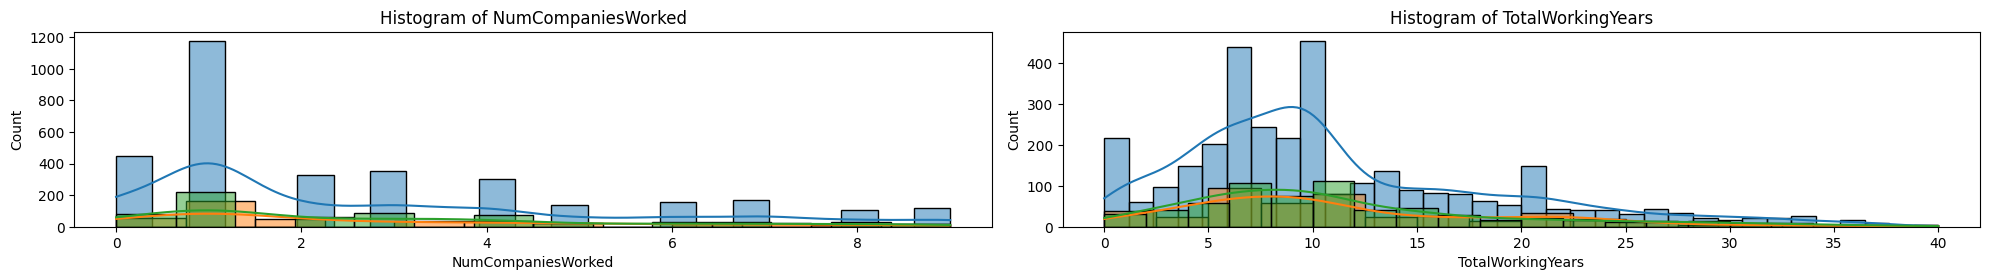

In [309]:
# Columns to visualize
columns_to_visualize = ['NumCompaniesWorked', 'TotalWorkingYears']

# Plotting histograms and boxplots
plt.figure(figsize=(20, 5))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Histogram of {column}')

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_val[column], kde=True)
    plt.title(f'Histogram of {column}')

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_test[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Filling Null Values

In [310]:
from sklearn.impute import SimpleImputer

# Columns for different imputation strategies
median_columns = ['NumCompaniesWorked', 'TotalWorkingYears']
mode_columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

# Creating imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Imputing missing values with the median
X_train[median_columns] = median_imputer.fit_transform(X_train[median_columns])
X_val[median_columns] = median_imputer.fit_transform(X_val[median_columns])
X_test[median_columns] = median_imputer.fit_transform(X_test[median_columns])

# Imputing missing values with the mode
X_train[mode_columns] = mode_imputer.fit_transform(X_train[mode_columns])
X_val[mode_columns] = mode_imputer.fit_transform(X_val[mode_columns])
X_test[mode_columns] = mode_imputer.fit_transform(X_test[mode_columns])

Checking Datasets

In [311]:
# Checking count of null values for the sets
print(f'X_train: {X_train.isna().sum().sum()}')
print(f'X_val: {X_val.isna().sum().sum()}')
print(f'X_test: {X_test.isna().sum().sum()}')

X_train: 0
X_val: 0
X_test: 0


#### Handling Outliers for Train Set

Checking Graphs of Features with Outliers

In [312]:
# numeric_columns = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
#                    'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion',
#                    'YearsWithCurrManager','Non_Working_Days','total_seconds','average_seconds']

# # Identifying columns with outliers
# outlier_columns = []
# for column in numeric_columns:
#     z_scores = np.abs(stats.zscore(X_train[column]))
#     if np.any(z_scores > 3):
#         outlier_columns.append(column)

# # Visualizing boxplots for columns with outliers
# num_plots = len(outlier_columns)
# plt.figure(figsize=(20, 4 * num_plots))
# for i, column in enumerate(outlier_columns, 1):
#     plt.subplot(num_plots, 1, i)
#     sns.boxplot(y=X_train[column])
#     plt.title(f'{column}')
# plt.tight_layout()
# plt.show()

Removing Outliers

In [313]:
# # Calculate the z-scores for each column and filter out rows with z-scores greater than 3
# X_train_cleaned, y_train_cleaned = X_train.copy(), y_train.copy()
# for column in outlier_columns:
#     z_scores = np.abs(stats.zscore(X_train_cleaned[column]))
#     X_train_cleaned = X_train_cleaned[z_scores <= 3]

# outlier_indices = set(X_train.index) - set(X_train_cleaned.index)
# y_train_cleaned = y_train_cleaned.drop(outlier_indices)

# # Visualizing boxplots for cleaned columns
# # num_plots = len(outlier_columns)
# # plt.figure(figsize=(20, 4 * num_plots))
# # for i, column in enumerate(outlier_columns, 1):
# #     plt.subplot(num_plots, 1, i)
# #     sns.boxplot(y=X_train_cleaned[column])
# #     plt.title(f'{column} (Cleaned)')
# # plt.tight_layout()
# # plt.show()

# print(f"X_train: {X_train.shape}")
# print(f"y_train: {y_train.shape}")
# print(f"X_train_cleaned: {X_train_cleaned.shape}")
# print(f"y_train_cleaned: {y_train_cleaned.shape}")

#### Correlation Matrix

Correlation Matrix for Train Data

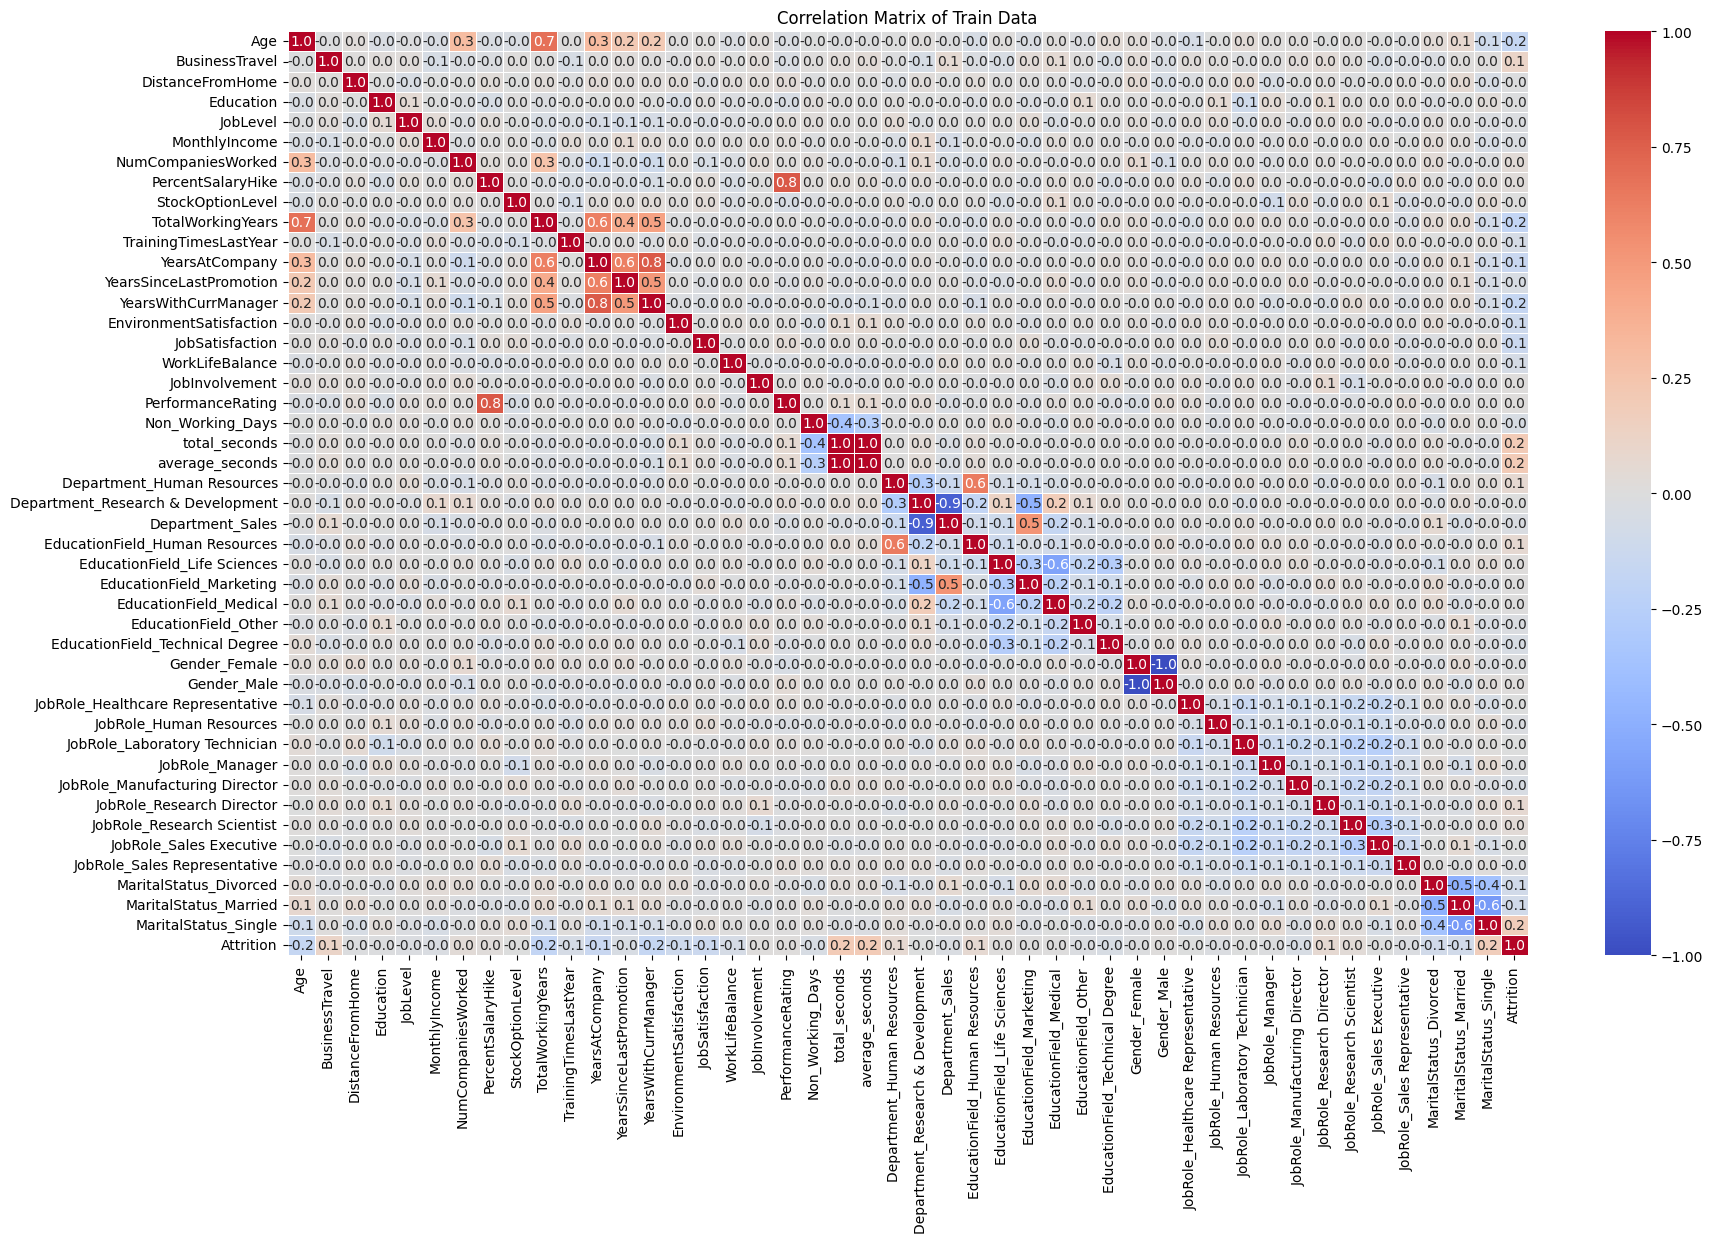

In [314]:
# Merging X_train_cleaned and y_train_cleaned datasets
train_data = pd.concat([X_train, y_train], axis=1)

# Calculating correlation matrix
correlation_matrix = train_data.corr().round(3)

# Visualizing the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1f')
plt.title('Correlation Matrix of Train Data')
plt.show()

Selecting Top Correlated Features

In [315]:
# Examining correlations with the target variable
correlations_with_target = correlation_matrix['Attrition'].abs().sort_values(ascending=False)

# Selecting top 15 features with highest correlation with the target variable
num_features_to_select = 15
top_features = correlations_with_target.head(num_features_to_select)

print(f"Top {num_features_to_select} features with highest correlation with Attrition:\n")
print(top_features)

Top 15 features with highest correlation with Attrition:

Attrition                         1.000
average_seconds                   0.201
total_seconds                     0.199
TotalWorkingYears                 0.180
MaritalStatus_Single              0.177
Age                               0.171
YearsWithCurrManager              0.166
YearsAtCompany                    0.147
JobSatisfaction                   0.128
BusinessTravel                    0.117
EnvironmentSatisfaction           0.110
MaritalStatus_Married             0.092
MaritalStatus_Divorced            0.088
Department_Human Resources        0.068
EducationField_Human Resources    0.067
Name: Attrition, dtype: float64


Correlation Matrix for Selected Features

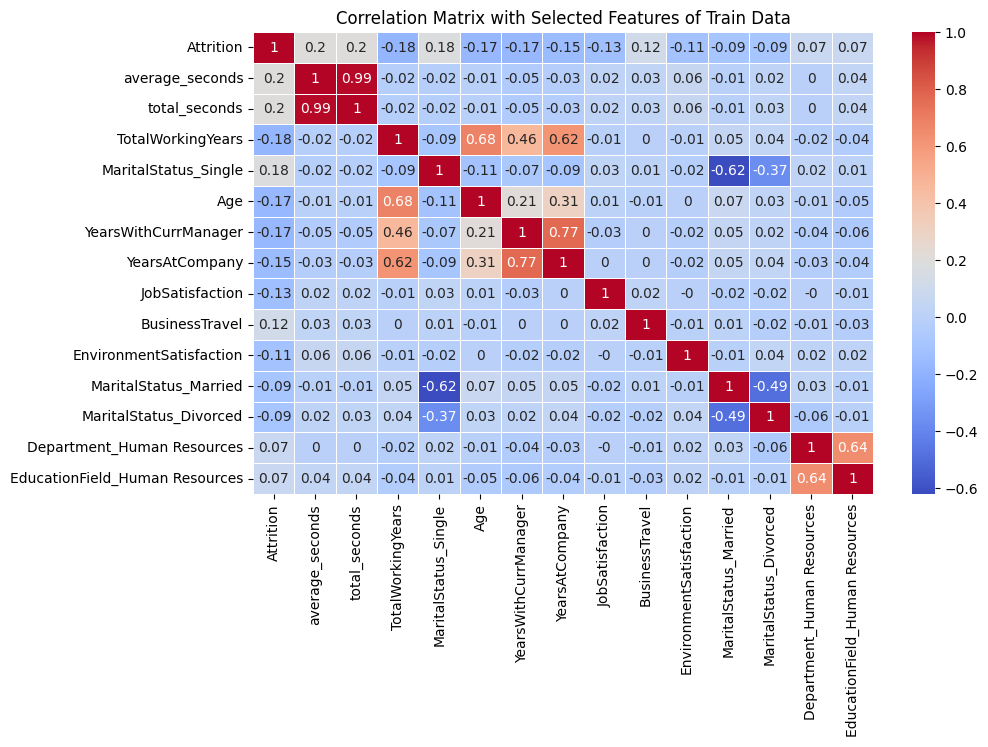

In [316]:
# Dropping columns other than the top selected features and creating a new correlation matrix
selected_features = top_features.index
train_data_selected = train_data[selected_features]

# Calculating a new correlation matrix
correlation_matrix_selected = train_data_selected.corr().round(2)

# Visualizing the updated correlation matrix with selected features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Selected Features of Train Data')
plt.show()

#### Evaluating the Model Performance

In [317]:
#!pip install xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [318]:
# Function to evaluate model
def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    return accuracy, precision, recall

In [319]:
# Converting the data to C-contiguous arrays for compatibility
X_train = np.ascontiguousarray(X_train)
X_val = np.ascontiguousarray(X_val)
X_test = np.ascontiguousarray(X_test)

#### Optimizing Different Models Using Randomized Search CV

Random Forest

In [320]:
# Defining the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing and performing Randomized Search CV for Random Forest
rf = RandomForestClassifier(random_state=42)
rf_model = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=40, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rf_model.best_params_}")

random_forest_metrics = evaluate_model(rf_model, X_val, y_val)
print(f"Random Forest - Accuracy: {random_forest_metrics[0]}, Precision: {random_forest_metrics[1]}, Recall: {random_forest_metrics[2]}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}
Random Forest - Accuracy: 0.9954648526077098, Precision: 1.0, Recall: 0.9726027397260274


XGBoost

In [321]:
# Defining the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initializing and performing Randomized Search CV for XGBoost
xgb = XGBClassifier(random_state=42)
xgb_model = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=40, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {xgb_model.best_params_}")

xgb_metrics = evaluate_model(xgb_model, X_val, y_val)
print(f"XGBoost - Accuracy: {xgb_metrics[0]}, Precision: {xgb_metrics[1]}, Recall: {xgb_metrics[2]}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
XGBoost - Accuracy: 0.9977324263038548, Precision: 0.9864864864864865, Recall: 1.0


#### Evaluating the XGBoost Model on the Test Data

In [322]:
y_pred = xgb_model.predict(X_train)

# Generating confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Confusion Matrix:")
print(cm_df.to_string())

# Calculating accuracy, recall and precision
test_accuracy = accuracy_score(y_train, y_pred).round(3)
test_precision = precision_score(y_train, y_pred).round(3)
test_recall = recall_score(y_train, y_pred).round(3)
test_f1 = metrics.f1_score(y_train, y_pred).round(3)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 score: {test_f1}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         2764            0
Actual 1            0          543
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [323]:
y_pred = xgb_model.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Confusion Matrix:")
print(cm_df.to_string())

# Calculating accuracy, recall and precision
test_accuracy = accuracy_score(y_test, y_pred).round(3)
test_precision = precision_score(y_test, y_pred).round(3)
test_recall = recall_score(y_test, y_pred).round(3)
test_f1 = metrics.f1_score(y_test, y_pred).round(3)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 score: {test_f1}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          566            1
Actual 1            2           93
Accuracy: 0.995
Precision: 0.989
Recall: 0.979
F1 score: 0.984


Learning Curve

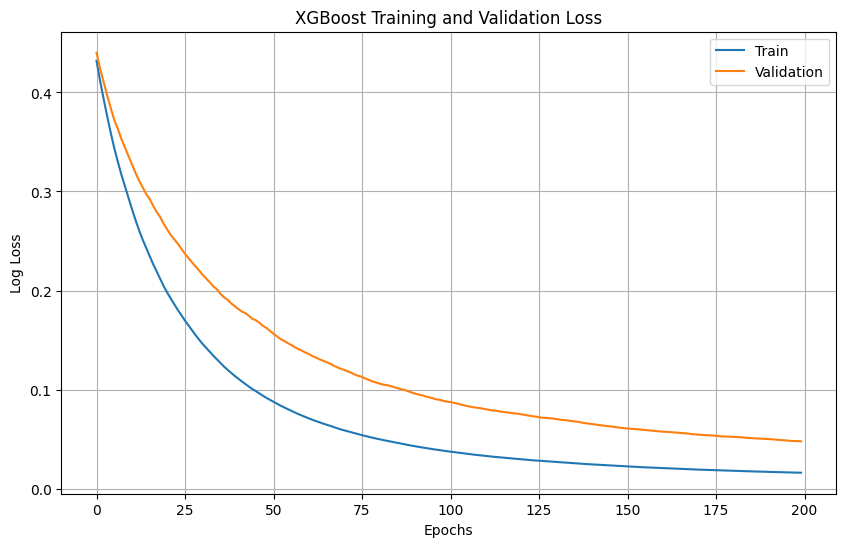

In [324]:
import xgboost as xgb
# Converting data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Defining parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'subsample': 0.9,
    'n_estimators': 250,
    'max_depth': 11,
    'learning_rate': 0.05,
    'colsample_bytree': 0.9,
    'eval_metric': 'logloss'  # Metric to monitor during training
}

# Training the model
evals_result = {}  # Dictionary to store evaluation results
num_rounds = 200  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds, evals=[(dtrain, 'train'), (dval, 'eval')],
                evals_result=evals_result, early_stopping_rounds=10, verbose_eval=False)

# Extracting evaluation results
train_results = evals_result['train']
val_results = evals_result['eval']

# Extracting log loss values from evaluation results
train_logloss = train_results['logloss']
val_logloss = val_results['logloss']

# Plotting training and validation loss
epochs = len(train_logloss)
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, train_logloss, label='Train')
plt.plot(x_axis, val_logloss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


#### Seeing What Happens When Reducing Features with Low Correlation

Determining Features to Stay

In [260]:
# Calculating correlation matrix
correlation_matrix = train_data.corr().round(3)

# Examining correlations with the target variable (by default, the last column, 'Attrition')
correlations_with_target = correlation_matrix['Attrition'].abs().sort_values(ascending=False)

# Selecting top 15 features with highest correlation with Attrition
num_features_to_select = 15
top_features = correlations_with_target.head(num_features_to_select + 1).drop('Attrition')

print(f"Top {num_features_to_select} features with highest correlation with Attrition:\n")
print(top_features)

Top 15 features with highest correlation with Attrition:

average_seconds                   0.215
total_seconds                     0.212
TotalWorkingYears                 0.189
MaritalStatus_Single              0.179
YearsWithCurrManager              0.171
YearsAtCompany                    0.171
Age                               0.169
JobSatisfaction                   0.136
EnvironmentSatisfaction           0.117
BusinessTravel                    0.115
MaritalStatus_Married             0.099
MaritalStatus_Divorced            0.083
Department_Human Resources        0.071
EducationField_Human Resources    0.066
JobRole_Research Director         0.064
Name: Attrition, dtype: float64


Removing Features with Low Correlation

In [261]:
# Getting the names of the top features
selected_features = top_features.index.tolist()

# Reducing the dataset to only top features
X_train_reduced = X_train[selected_features]
X_val_reduced = X_val[selected_features]
X_test_reduced = X_test[selected_features]

# Verify the reduced datasets
print("X_train_cleaned_reduced:", X_train_reduced.shape)
print("X_val_reduced:", X_val_reduced.shape)
print("X_test_reduced:", X_test_reduced.shape)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Training XGBoost Model

In [255]:
# Defining the parameter grid for XGBoost
params = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initializing and performing Randomized Search CV for XGBoost
xgb = XGBClassifier(random_state=42)
xgb_model2 = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=40, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_model2.fit(X_train_reduced, y_train)

print(f"Best parameters for XGBoost: {xgb_model2.best_params_}")

xgb_metrics = evaluate_model(xgb_model2, X_val_reduced, y_val)
print(f"XGBoost - Accuracy: {xgb_metrics[0]}, Precision: {xgb_metrics[1]}, Recall: {xgb_metrics[2]}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
XGBoost - Accuracy: 0.9750566893424036, Precision: 0.9305555555555556, Recall: 0.9178082191780822


In [256]:
y_pred = xgb_model2.predict(X_test_reduced)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Confusion Matrix:")
print(cm_df.to_string())

# Calculating accuracy, recall and precision
test_accuracy = accuracy_score(y_test, y_pred).round(3)
test_precision = precision_score(y_test, y_pred).round(3)
test_recall = recall_score(y_test, y_pred).round(3)
test_f1 = metrics.f1_score(y_test, y_pred).round(3)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 score: {test_f1}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          564            3
Actual 1           13           82
Accuracy: 0.976
Precision: 0.965
Recall: 0.863
F1 score: 0.911


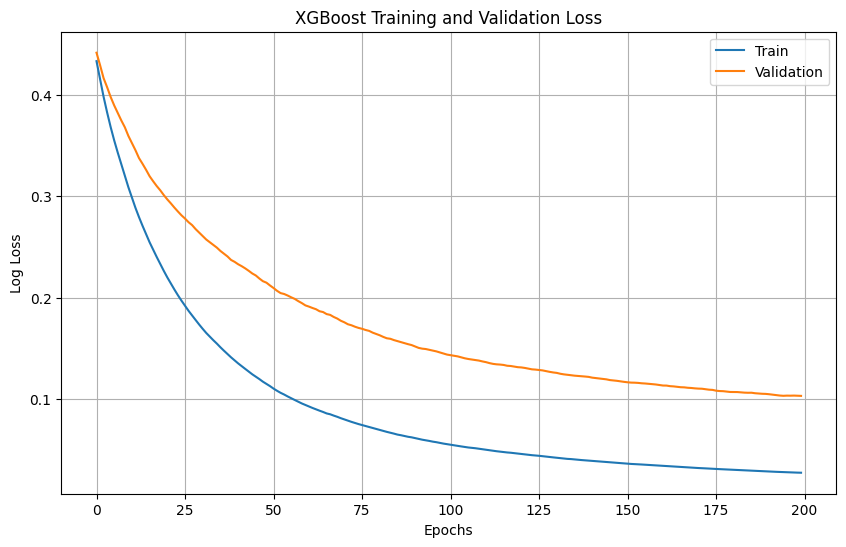

In [259]:
import xgboost as xgb
# Converting data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_reduced, label=y_train)
dval = xgb.DMatrix(X_val_reduced, label=y_val)

# Defining parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'subsample': 0.9,
    'n_estimators': 250,
    'max_depth': 11,
    'learning_rate': 0.05,
    'colsample_bytree': 0.9,
    'eval_metric': 'logloss'  # Metric to monitor during training
}

# Training the model
evals_result = {}  # Dictionary to store evaluation results
num_rounds = 200  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds, evals=[(dtrain, 'train'), (dval, 'eval')],
                evals_result=evals_result, early_stopping_rounds=10, verbose_eval=False)

# Extracting evaluation results
train_results = evals_result['train']
val_results = evals_result['eval']

# Extracting log loss values from evaluation results
train_logloss = train_results['logloss']
val_logloss = val_results['logloss']

# Plotting training and validation loss
epochs = len(train_logloss)
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, train_logloss, label='Train')
plt.plot(x_axis, val_logloss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()